Date Preparation and Exploration:

1. Reading a Titanic dataset from a CSV file

2. Detecting missing values
Missing values reduce the representativeness of the sample, and furthermore, might distort inferences about the population. 
How many missing values are there in  age  Attribute of Titanic dataset  

3. Imputing missing values

After detecting the number of missing values within each attribute, we have to impute the missing values since they might have a significant effect on the conclusions that can be drawn from the data.

Assign the missing value to the most likely port, which is Southampton

4. Exploring and visualizing data

After imputing the missing values, one should perform an exploratory analysis, which involves using a visualization plot and an aggregation method to summarize the data characteristics. The result helps the user gain a better understanding of the data in use.

a) Bar Plot which shows how many passengers survived and how many perished
b) Bar Plot which shows how many passesngers travelled by first class, second class and thrid class
c) Barplot which shows how many are male passengers and how many are female passengers
d) plot histogram of different ages
e) Stacked barplot's  to find out 
 -which gender is more likely to perish during shipwrecks
 -Passenger survival by class
f) Box Plot which shows passenger survival by age




In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv (r'/content/drive/MyDrive/Titanic data.csv')

In [ ]:
Count_Null= df['Age'].isnull().sum()
print(Count_Null)

177


In [ ]:
df['Age'] = df['Age'].fillna(0)

df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     0.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
df.fillna('Southampton', inplace=True)
print(df)

     PassengerId  Survived  Pclass  ...     Fare        Cabin  Embarked
0              1         0       3  ...   7.2500  Southampton         S
1              2         1       1  ...  71.2833          C85         C
2              3         1       3  ...   7.9250  Southampton         S
3              4         1       1  ...  53.1000         C123         S
4              5         0       3  ...   8.0500  Southampton         S
..           ...       ...     ...  ...      ...          ...       ...
886          887         0       2  ...  13.0000  Southampton         S
887          888         1       1  ...  30.0000          B42         S
888          889         0       3  ...  23.4500  Southampton         S
889          890         1       1  ...  30.0000         C148         C
890          891         0       3  ...   7.7500  Southampton         Q

[891 rows x 12 columns]


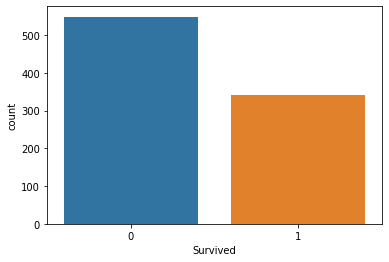

In [ ]:
sns.countplot(x='Survived', data=df)

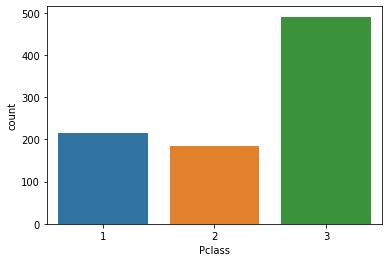

In [ ]:
sns.countplot(x='Pclass', data=df)

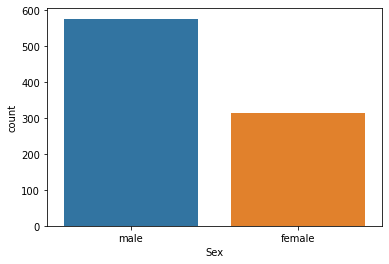

In [ ]:
sns.countplot(x='Sex', data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


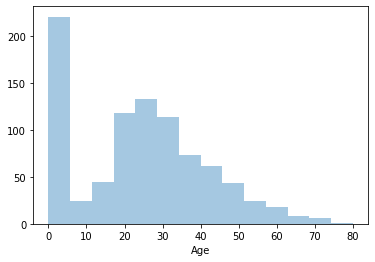

In [ ]:
sns.distplot(df.Age, kde=False)

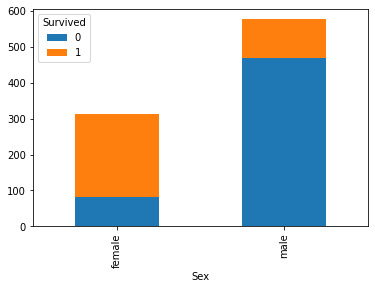

In [ ]:
df.groupby(['Sex', 'Survived']).size().unstack().plot(kind='bar', stacked=True)

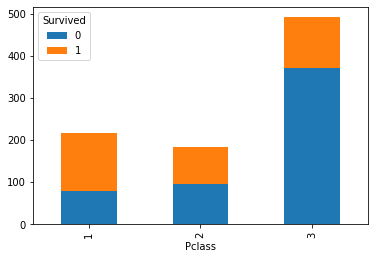

In [ ]:
df.groupby(['Pclass', 'Survived']).size().unstack().plot(kind='bar', stacked=True)

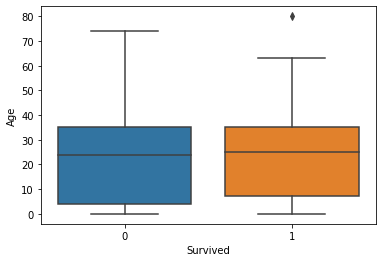

In [ ]:
boxplt = sns.boxplot(x="Survived", y="Age", data=df)

In [ ]:
import pandas as pd
superstore = pd.read_excel('/content/drive/MyDrive/sample_-_superstore_2 (2).xls')
x=superstore.groupby('Sub-Category')['Profit'].agg(['sum'])
x

,sum
Sub-Category,
Accessories,41936.6357
Appliances,18138.0054
Art,6527.7870
Binders,30221.7633
Bookcases,-3472.5560
Chairs,26590.1663
Copiers,55617.8249
Envelopes,6964.1767
Fasteners,949.5182


In [ ]:
superstore= superstore[(superstore['Category']!= 'Furniture') & (superstore['Segment']!= 'Home Office')]
superstore

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987,9988,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,Georgia,30605,South,TEC-AC-10001539,Technology,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,79.990,1,0.0,28.7964
9988,9989,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,Georgia,30605,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0.0,55.6470
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200


In [ ]:
superstore.sort_values(by=['Sub-Category'], inplace=True, ascending=False)
superstore['Sub-Category']

9728       Supplies
9076       Supplies
5855       Supplies
4762       Supplies
7184       Supplies
           ...     
9941    Accessories
7222    Accessories
47      Accessories
7306    Accessories
1075    Accessories
Name: Sub-Category, Length: 7873, dtype: object

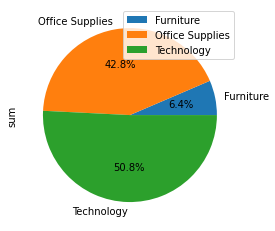

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
superstore = pd.read_excel('/content/drive/MyDrive/sample_-_superstore_2 (2).xls')
x = superstore.groupby('Category')['Profit'].agg(['sum'])
x.plot.pie(y='sum',autopct='%1.1f%%')



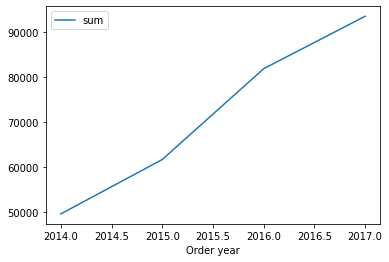

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
superstore['Order year'] = superstore['Order Date'].dt.year
x = superstore['Order year']
y = superstore.groupby('Order year')['Profit'].agg(['sum']).plot.line()
y


In [ ]:
Top10Customers = superstore.sort_values(['Profit'],ascending=False).head(10)
Top10Customers 

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order year
6826,6827,CA-2016-118689,2016-10-02,2016-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,Indiana,47905,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760,2016
8153,8154,CA-2017-140151,2017-03-23,2017-03-25,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,Washington,98115,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808,2017
4190,4191,CA-2017-166709,2017-11-17,2017-11-22,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,Delaware,19711,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856,2017
9039,9040,CA-2016-117121,2016-12-17,2016-12-21,Standard Class,AB-10105,Adrian Barton,Consumer,United States,Detroit,Michigan,48205,Central,OFF-BI-10000545,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,9892.740,13,0.0,4946.3700,2016
4098,4099,CA-2014-116904,2014-09-23,2014-09-28,Standard Class,SC-20095,Sanjit Chand,Consumer,United States,Minneapolis,Minnesota,55407,Central,OFF-BI-10001120,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,9449.950,5,0.0,4630.4755,2014
2623,2624,CA-2017-127180,2017-10-22,2017-10-24,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,New York,10024,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888,2017
509,510,CA-2015-145352,2015-03-16,2015-03-22,Standard Class,CM-12385,Christopher Martinez,Consumer,United States,Atlanta,Georgia,30318,South,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,6354.950,5,0.0,3177.4750,2015
8488,8489,CA-2016-158841,2016-02-02,2016-02-04,Second Class,SE-20110,Sanjit Engle,Consumer,United States,Arlington,Virginia,22204,South,TEC-MA-10001127,Technology,Machines,HP Designjet T520 Inkjet Large Format Printer ...,8749.950,5,0.0,2799.9840,2016
7666,7667,US-2016-140158,2016-10-04,2016-10-08,Standard Class,DR-12940,Daniel Raglin,Home Office,United States,Providence,Rhode Island,2908,East,TEC-CO-10001449,Technology,Copiers,Hewlett Packard LaserJet 3310 Copier,5399.910,9,0.0,2591.9568,2016
6520,6521,CA-2017-138289,2017-01-16,2017-01-18,Second Class,AR-10540,Andy Reiter,Consumer,United States,Jackson,Michigan,49201,Central,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,5443.960,4,0.0,2504.2216,2017


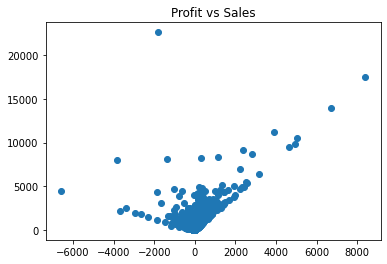

In [ ]:
import matplotlib.pyplot as plt
x = superstore['Profit']
y = superstore['Sales']
plt.title('Profit vs Sales' )
plt.scatter(x, y)
plt.show()


Visualization:

5. Read from sample superstore xl file  into pandas dataframe and perform below operations

a) Display Subcategory wise sum of profit
b) Exclude Office Furniture SubCategory
c) Sort SubCategory in Desc order
d) Categorywise sum of profit in pie chart
e) Line Chart yearwise sum of profit
f) Display Top 10 most profitable customers
g) scatter plot between profit and sales


6. Create dept dataframe and emp dataframe  with suitable data and perform inner , leftouter,RightOuter and FullOuter Joins based on common column Deptno.

Dept Data Frame will have
Deptno
Dname
Loc

Emp DataFrame will have below columns
Deptno
Eno
Sal


In [ ]:
import pandas as pd
dept = pd.DataFrame({
    'Deptno':[101,102,103,104],
    'Dept_name':['Accounts','Human Resource','IT','Security'],
    'Loc':['Pune','Bengalore','Hyderabad','Kochi']})
emp = pd.DataFrame({
    'Deptno':[101,102,103,104],
    'Eno':[1,2,3,4],
    'Sal':[10000,20000,40000,34000]})

#Inner Join
Inner = pd.merge(dept,emp,on='Deptno',how='inner')
Inner


,Deptno,Dept_name,Loc,Eno,Sal
0,101,Accounts,Pune,1,10000
1,102,Human Resource,Bengalore,2,20000
2,103,IT,Hyderabad,3,40000
3,104,Security,Kochi,4,34000


In [ ]:
Right = pd.merge(dept,emp[['Deptno','Eno']],on='Deptno',how='right')
Right


,Deptno,Dept_name,Loc,Eno
0,101,Accounts,Pune,1
1,102,Human Resource,Bengalore,2
2,103,IT,Hyderabad,3
3,104,Security,Kochi,4


In [ ]:
left = pd.merge(dept,emp[['Deptno','Sal']],on='Deptno',how='left')
left

,Deptno,Dept_name,Loc,Sal
0,101,Accounts,Pune,10000
1,102,Human Resource,Bengalore,20000
2,103,IT,Hyderabad,40000
3,104,Security,Kochi,34000


In [ ]:
Outer = pd.merge(dept,emp[['Eno','Deptno']],on='Deptno',how='outer')
Outer


,Deptno,Dept_name,Loc,Eno
0,101,Accounts,Pune,1
1,102,Human Resource,Bengalore,2
2,103,IT,Hyderabad,3
3,104,Security,Kochi,4


Descriptive and Inferential Statistics:
7. Suppose the height of men in the United Kingdom is known to be normally distributed with a mean of 177 centimeters and a standard deviation of 10 centimeters. If you were to select a man from the United Kingdom population at random, what is the probability that he would be more than 200 centimeters tall?

8.Let's take the mileage and horsepower of various cars and see if there is a relation between the two.

mpg = [21.0, 21.0, 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8, 16.4, 17.3, 15.2, 10.4, 10.4, 14.7, 32.4, 30.4,
       33.9, 21.5, 15.5, 15.2, 13.3, 19.2, 27.3, 26.0, 30.4, 15.8, 19.7, 15.0, 21.4]
hp = [110, 110, 93, 110, 175, 105, 245, 62, 95, 123, 123, 180, 180, 180, 205, 215, 230, 66, 52, 65, 97, 150, 150, 245, 175, 66, 91, 113, 264, 175, 335, 109]


9.  Perform T-test on two classes that are given a mathematics test and have 10 students in each class. Determine if 2 distributions are identical or not.

class1_score = np.array([45.0, 40.0, 49.0, 52.0, 54.0, 64.0, 36.0, 41.0, 42.0, 34.0])

class2_score = np.array([75.0, 85.0, 53.0, 70.0, 72.0, 93.0, 61.0, 65.0, 65.0, 72.0])

10. The mean score of the mathematics exam at a national level is 60 marks and the standard deviation is 3 marks. The mean marks of a class are 53. The null hypothesis is that the mean marks of the class are similar to the national average.  Test this Hypothesis using Z – Test.

11. Calculate Pearson correlation coefficient between Girth and Volume in trees dataset( trees csv file) Pl mention what you draw from correlation coefficient 

12. Suppose that you want to perform a hypothesis test to help determine whether the correlation between tree girth and tree volume is statistically significant.

Perform a two-sided test of the Pearson's product moment correlation between tree girth and volume at the 5% significance level,


In [ ]:
var = 10
mean = 177
x = 200
y = x-mean
z = y/var
z

2.3

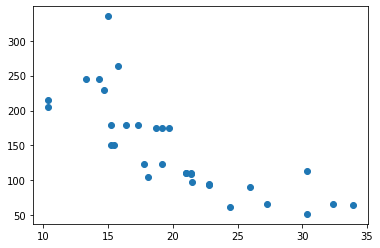

In [ ]:
from scipy import stats

mpg = [21.0, 21.0, 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8, 16.4, 17.3, 15.2, 10.4, 10.4, 14.7, 32.4, 30.4,
       33.9, 21.5, 15.5, 15.2, 13.3, 19.2, 27.3, 26.0, 30.4, 15.8, 19.7, 15.0, 21.4]
hp = [110, 110, 93, 110, 175, 105, 245, 62, 95, 123, 123, 180, 180, 180, 205, 215, 230, 66, 52, 65, 97, 150, 150, 245, 175, 66, 91, 113, 264, 175, 335, 109]

stats.pearsonr(mpg,hp)
plt.scatter(mpg,hp)
plt.show()

In [ ]:
import numpy as np
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t

data1 = np.array([45.0, 40.0, 49.0, 52.0, 54.0, 64.0, 36.0, 41.0, 42.0, 34.0])

data2 = np.array([75.0, 85.0, 53.0, 70.0, 72.0, 93.0, 61.0, 65.0, 65.0, 72.0])
alpha = 0.05

# calculate means
mean1 = mean(data1)
mean2 = mean(data2)
# calculate standard errors
se1 = sem(data1)
se2 = sem(data2)
# standard error on the difference between the samples
sed = sqrt(se1**2.0 + se2**2.0)
# calculate the t statistic
t_stat = (mean1 - mean2) / sed
# degrees of freedom
df = len(data1) + len(data2) - 2
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print("t_stat :",t_stat)
print("df :",df)
print("cv :",cv)
print("p :",p)

if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

t_stat : -5.458195056848408
df : 18
cv : 1.7340636066175354
p : 3.482072285021509e-05
Reject the null hypothesis that the means are equal.


In [ ]:
import math
import numpy as np
from numpy.random import randn
from statsmodels.stats.weightstats import ztest
mean_maths_exam = 60
std_dev = 3
alpha =0.05
z_score = 1.645
mean_class = 53
null_mean = mean_class
a = mean_maths_exam - mean_class
sample_size = mean_class/mean_maths_exam
b = std_dev/math.sqrt(sample_size)
c = a/b
print(c)

if abs(c) <= z_score:
	print('Accept null hypothesis.')
else:
	print('Reject the null hypothesis.')


2.193002339091151
Reject the null hypothesis.


In [ ]:
import pandas as pd
from scipy.stats import pearsonr
  
col_name=['Girth','Volume']
df = pd.read_csv('/content/drive/MyDrive/trees.csv',usecols=col_name)
  
# Convert dataframe into series
list1 = df['Girth']
list2 = df['Volume']
  
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

if corr<0 :
  print('Negative correlation')
else:
  print('Positive correlation')

Pearsons correlation: 0.967
Positive correlation


In [ ]:
alpha =0.05
P = 0.967
if P>alpha:
  print('Accept Null Hypothesis')
else:
  print('Reject Null Hypothesis')



Accept Null Hypothesis


12. Use Automobile price data Raw csv file : 
•	Split data 80% to train 20% for test
•	predict price for 20% test data
•	Determine R-Squared value

13. The Pima Indians Diabetes Binary Classification dataset  csv file contains all of the data of female   patients of the same age belonging to Pima Indian heritage. The data includes medical data, such as glucose and insulin levels, as well as lifestyle factors of the patients. The columns in the dataset are as follows: 
•	Number of times pregnant
•	Plasma glucose concentration of 2 hours in an oral glucose tolerance test
•	Diastolic blood pressure (mm Hg)
•	Triceps skin fold thickness (mm)
•	2-hour serum insulin (mu U/ml)
•	Body mass index (weight in kg/(height in m)^2)
•	Diabetes pedigree function
•	Age (years)
•	Class variable (0 or 1)
•	The last column is the target variable or class variable that takes the value 0 or 1, where 1 is positive or affected by diabetes and 0 means that the patient is not affected.
•	You have to build models that could predict whether a patient has diabetes or tests positive or not using logistic regression

14.  Use hotel.csv file and Show how to cluster hotel location data with K-means Clustering. That is perform K-means clustering on hotel location data to identify whether the hotels are located in the same district. 
 Using k-means cluster location data for 3 clusters. 



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
col_name=['normalized-losses','horsepower','price','compression-ratio','bore','stroke']
df = pd.read_csv('/content/drive/MyDrive/Automobile price data_raw.csv',sep=',',index_col=None,usecols=col_name)
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['price'] = df['price'].replace('?',0)
df['price'] = df['price'].replace(np.nan,0)


df['normalized-losses'] = pd.to_numeric(df['normalized-losses'], errors='coerce')
df['normalized-losses'] = df['normalized-losses'].replace('?',0)
df['normalized-losses'] = df['normalized-losses'].replace(np.nan,0)
n = df['normalized-losses']

df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['horsepower'] = df['horsepower'].replace('?',0)
df['horsepower'] = df['horsepower'].replace(np.nan,0)
n = df['horsepower']

df['bore'] = df['bore'].replace('?',0)
df['bore'] = df['bore'].replace(np.nan,0)
n = df['bore']

df['stroke'] = pd.to_numeric(df['stroke'], errors='coerce')
df['stroke'] = df['stroke'].replace('?',0)
df['stroke'] = df['stroke'].replace(np.nan,0)
n = df['stroke']

#df['peak-rpm'] = pd.to_numeric(df['peak-rpm'], errors='coerce')
#df['peak-rpm'] = df['peak-rpm'].replace('?',0)
#df['peak-rpm'] = df['peak-rpm'].replace(np.nan,0)
#n = df['peak-rpm']

df


,normalized-losses,bore,stroke,compression-ratio,horsepower,price
0,0.0,3.47,2.68,9.0,111.0,13495.0
1,0.0,3.47,2.68,9.0,111.0,16500.0
2,0.0,2.68,3.47,9.0,154.0,16500.0
3,164.0,3.19,3.40,10.0,102.0,13950.0
4,164.0,3.19,3.40,8.0,115.0,17450.0
...,...,...,...,...,...,...
200,95.0,3.78,3.15,9.5,114.0,16845.0
201,95.0,3.78,3.15,8.7,160.0,19045.0
202,95.0,3.58,2.87,8.8,134.0,21485.0
203,95.0,3.01,3.40,23.0,106.0,22470.0


In [ ]:
import sklearn
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn import linear_model, preprocessing
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
X = np.array(df.drop(['price'],1))
y = np.array(df['price'])

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)

In [ ]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
acc = model.score(X_test, y_test)
print(acc)

0.04878048780487805


In [ ]:
prediction = model.predict(X_test)
print(prediction)

[ 7689. 11694.  7895.  8949. 11900.  5118. 16845.  7295.  7689.  5195.
 13499.     0.  7689.  7689.  7957.  7463.  7295.  5118.  5118.  7126.
 16503.  6529.  5389. 11845.  5118.  5499.  8449. 13499.  5389.  7295.
  6529.  5118.  5572.  9279.     0.  8449.  7689. 18150.     0. 11048.
 30760.]


In [ ]:
y_test

array([ 8499., 16515.,  9960.,  9995., 13200.,  6938., 31600., 11245.,
       16630.,  5399., 13499., 36880.,  9538., 17450.,  7957., 10295.,
        8948.,  8358.,  6488.,  9095., 40960.,  9233.,  8058.,  8558.,
        5348.,  6479.,  9989., 18620.,  6189.,  8495.,  7775.,  7738.,
        6695.,  9959., 41315., 17669., 10945., 12964., 16500., 13860.,
       32528.])

In [ ]:
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
      5118.0       0.00      0.00      0.00         0
      5195.0       0.00      0.00      0.00         0
      5348.0       0.00      0.00      0.00         1
      5389.0       0.00      0.00      0.00         0
      5399.0       0.00      0.00      0.00         1
      5499.0       0.00      0.00      0.00         0
      5572.0       0.00      0.00      0.00         0
      6189.0       0.00      0.00      0.00         1
      6479.0       0.00      0.00      0.00         1
      6488.0       0.00      0.00      0.00         1
      6529.0       0.00      0.00      0.00         0
      6695.0       0.00      0.00      0.00         1
      6938.0       0.00      0.00      0.00         1
      7126.0       0.00      0.00      0.00         0
      7295.0   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib
df = pd.read_csv('/content/drive/MyDrive/Pima Indians Diabetes Binary Class.csv',sep=',',index_col=None)
df.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
Train = df[:650]
Test = df[650:750]
CrossCheck = df[750:]

trainLabel = np.asarray(Train['Class variable (0 or 1)'])
trainData = np.asarray(Train.drop('Class variable (0 or 1)',1))
testLabel = np.asarray(Test['Class variable (0 or 1)'])
testData = np.asarray(Test.drop('Class variable (0 or 1)',1))

In [ ]:
#Normalise the data
means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)
trainData = (trainData - means)/stds
testData = (testData - means)/stds
np.mean(trainData, axis=0) 

# np.mean(trainData, axis=0) => check that new means equal 0
# np.std(trainData, axis=0) => check that new stds equal 1


array([ 5.46571335e-18, -1.50307117e-16,  3.22477088e-16, -2.39124959e-17,
        3.82599935e-17,  4.91914202e-17,  1.50307117e-16,  1.17512837e-16])

In [ ]:
np.std(trainData, axis=0) 

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
diabetesCheck = LogisticRegression()
diabetesCheck.fit(trainData, trainLabel)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
accuracy = diabetesCheck.score(testData, testLabel)
print("accuracy = ", accuracy * 100, "%")

accuracy =  78.0 %


In [ ]:
joblib.dump([diabetesCheck, means, stds], 'diabeteseModel.pkl')

['diabeteseModel.pkl']

In [ ]:
diabetesLoadedModel, means, stds = joblib.load('diabeteseModel.pkl')
accuracyModel = diabetesLoadedModel.score(testData, testLabel)
print("accuracy = ",accuracyModel * 100,"%")

accuracy =  78.0 %


In [ ]:
print(CrossCheck.head())

     Number of times pregnant  ...  Class variable (0 or 1)
750                         4  ...                        1
751                         1  ...                        0
752                         3  ...                        0
753                         0  ...                        1
754                         8  ...                        1

[5 rows x 9 columns]


In [ ]:
sampleData = CrossCheck[:5]
# prepare sample
sampleDataFeatures = np.asarray(sampleData.drop('Class variable (0 or 1)',1))
sampleDataFeatures = (sampleDataFeatures - means)/stds
# predict
predictionProbability = diabetesLoadedModel.predict_proba(sampleDataFeatures)
prediction = diabetesLoadedModel.predict(sampleDataFeatures)
print('Probability:', predictionProbability)
print('prediction:', prediction)

Probability: [[0.44077634 0.55922366]
 [0.7224006  0.2775994 ]
 [0.89838515 0.10161485]
 [0.32963847 0.67036153]
 [0.30136123 0.69863877]]
prediction: [1 0 0 1 1]


In [ ]:
pip install kmodes

In [ ]:
import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/hotel.csv',sep=',',index_col=None)
print(df.shape)
df.head()

(102, 5)


,address,lat,lon,title,district
0,"No.30 Youya Road, Beitou District, Taipei 1124...",25.137793,121.51495,Grand View Resort Beitou,Beitou
1,"No.28 Section 1, Minsheng East Road, Zhongshan...",25.057854,121.52409,YoMi Hotel,Zhongshan
2,"No.3 Zhongshan Road, Beitou District, Taipei 1...",25.137163,121.50544,Beitou Hot Spring Resort (Tian Yue Quan),Beitou
3,"No.18 Songgao Road, Xinyi District, Taipei 110...",25.039248,121.56741,Humble House Taipei,Xinyi
4,"4F., No.11, Sec. 2, Nanjing E. Road, Taipei 10...",25.052057,121.52831,Taipei Morning Hotel,Zhongshan


In [ ]:
categorical_features_idx = [0, 3, 4]

In [ ]:
mark_array=df.values

In [ ]:
kproto = KPrototypes(n_clusters=3, verbose=2, max_iter=20).fit(mark_array, categorical=categorical_features_idx)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 48, ncost: 4726.682449047399
Run: 1, iteration: 2/20, moves: 2, ncost: 4726.681384786668
Run: 1, iteration: 3/20, moves: 0, ncost: 4726.681384786668
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 12, ncost: 4774.91459676275
Run: 2, iteration: 2/20, moves: 8, ncost: 4726.681384786668
Run: 2, iteration: 3/20, moves: 0, ncost: 4726.681384786668
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 13, ncost: 4774.920168398112
Run: 3, iteration: 2/20, moves: 0, ncost: 4774.920168398112
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/20, moves: 72, ncost: 4799.039468955187
Run: 4, iteration: 2/20, moves: 9, ncost: 4774.913506195732
Run: 4, iteration: 3/20, moves: 0, ncost: 4774.913506195732
Init: initializin

In [ ]:
# Cluster Centroids
print(kproto.cluster_centroids_)

[['25.058236338028173' '121.53149952112676'
  'No. 199, Lequn 2nd Road, Taipei, Taiwan, Taipei 10462, Taiwan '
  'Taipei Marriott Hotel' 'Zhongshan']
 ['25.135587888888796' '121.508662277778'
  'No.1 Qiyan Road, Beitou District, Taipei 11242, Taiwan '
  'Atami Hotel Taipei Onsen' 'Beitou']
 ['25.036485846153848' '121.56455815384616'
  'No.153 Songshan Road, Xinyi District, Taipei 110, Taiwan '
  'EnRich House' 'Xinyi']]


In [ ]:
# Prediction
clusters = kproto.predict(mark_array, categorical=categorical_features_idx)

In [ ]:
df['cluster'] = list(clusters)

In [ ]:
df[df['cluster']== 0].head(10)

,address,lat,lon,title,district,cluster
1,"No.28 Section 1, Minsheng East Road, Zhongshan...",25.057854,121.524090,YoMi Hotel,Zhongshan,0
4,"4F., No.11, Sec. 2, Nanjing E. Road, Taipei 10...",25.052057,121.528310,Taipei Morning Hotel,Zhongshan,0
5,"No.131 Section 3, Nanjing East Road, Zhongshan...",25.052030,121.540970,FX Hotel - Taipei Nanjing East Road,Zhongshan,0
6,"2F, No.42, Section 1, Minsheng East Road, Taip...",25.058155,121.524510,Via Hotel Loft,Zhongshan,0
8,"No.63 Sung Chiang Road, Taipei 104, Taiwan",25.048920,121.533290,Evergreen Laurel Hotel,Zhongshan,0
9,"No.600 Linshen North Road, Zhongshan District,...",25.065920,121.525690,Imperial Hotel Taipei,Zhongshan,0
11,"No.186 Sung Chiang Road, Taipei 10467, Taiwan",25.056469,121.532776,Taipei Gala Hotel,Zhongshan,0
12,"No.39 Changchun Road, Zhongshan District, Taip...",25.054940,121.525910,Tokyo International Hotel,Zhongshan,0
14,"No.253 Songjiang Road, Taipei 104, Taiwan",25.059462,121.533380,Check Inn Taipei,Zhongshan,0
16,"No.646 Linsen North Road, Taipei 104, Taiwan",25.068357,121.525530,Riviera Hotel,Zhongshan,0


In [ ]:
df[df['cluster']==1].head(10)

,address,lat,lon,title,district,cluster
0,"No.30 Youya Road, Beitou District, Taipei 1124...",25.137793,121.514950,Grand View Resort Beitou,Beitou,1
2,"No.3 Zhongshan Road, Beitou District, Taipei 1...",25.137163,121.505440,Beitou Hot Spring Resort (Tian Yue Quan),Beitou,1
10,"No.11 Youya Road, Beitou District, Taipei 112,...",25.137170,121.512200,Hotel DOUBLE ONE,Beitou,1
13,"No.1 Qiyan Road, Beitou District, Taipei 11242...",25.134659,121.507195,The Gaia Hotel,Beitou,1
15,"No.26 Zhongshan Road, Beitou District, Taipei ...",25.137820,121.510260,Royal Seasons Hotel (Hot Spring Beitou),Beitou,1
21,"No.224 Cuang Ming Road, Beitou District, Taipe...",25.136030,121.505480,Sweetme Hotspring Resort,Beitou,1
22,"No.32 Zhongshan Road, Beitou District, Taipei ...",25.137833,121.510500,Villa 32,Beitou,1
27,"No.18 You Ya Road, Beitou District, Taipei 112...",25.137540,121.513710,Spring City Resort,Beitou,1
29,"No.240 Guangming Road, Beitou District, Taipei...",25.136260,121.507330,Golden Hot Spring Hotel,Beitou,1
34,"No.1 Yinguang Lane, Wenquan Road, Peitou Distr...",25.136600,121.513030,Nine Plus Spa Hot Spring Hotel,Beitou,1


In [ ]:
df[df['cluster']==2].head(10)

,address,lat,lon,title,district,cluster
3,"No.18 Songgao Road, Xinyi District, Taipei 110...",25.039248,121.567410,Humble House Taipei,Xinyi,2
7,"No.38 Songren Road, Xinyi District, Taipei 110...",25.037867,121.567960,Le Meridien Taipei,Xinyi,2
18,"No.297 Section 5, Zhongxiao East Road, Xinyi D...",25.040890,121.572950,THE Tango Taipei XinYi,Xinyi,2
25,"B1, No.16, Sec. 5, Xinyi Road, Xinyi District,...",25.032806,121.563300,Sparkle Hotel,Xinyi,2
54,"No.98 Yanchang Road, Xinyi District, Taipei 11...",25.044977,121.561500,Eslite Hotel,Xinyi,2
69,"3F, No.468, Section 4, Xinyi Road, Xinyi Distr...",25.032980,121.559130,AT Boutique Hotel,Xinyi,2
70,"No.30-148-20 Yongji Road, Xinyi District, Taip...",25.042774,121.567696,EnRich House,Xinyi,2
73,"No.385 Hsin-Yi Road, Section 4, Sinyi Road Sin...",25.033140,121.558130,Royal Best Suites,Xinyi,2
78,"No.15-2, Sec. 2, Keelung Rd, Taipei 110, Taiwan",25.029180,121.557250,HolyPro Boutique Hotel,Xinyi,2
82,"No.153 Songshan Road, Xinyi District, Taipei 1...",25.046530,121.577890,Wonstar Hotel (Songshan),Xinyi,2
